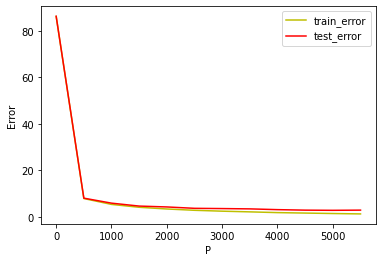

In [9]:
from mnist import MNIST
import numpy as np
import math
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
lamb=0.0001
sum=0
k=10
plot=[]
p_dimension=6000   # input the number of p
mndata=MNIST(r'C:\Users\praveen')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0
trainerrorpercentage=[]
devseterrorpercentage=[]

#hot_encoding of train labels
k1= np.array(labels_train).reshape(-1)
Y= np.eye(k)[k1]

# train function
def train(X_train,Y):
    (x,y)=np.shape(X_train)
    I=np.identity(y)
    a=np.linalg.solve(((np.dot(X_train.T,X_train)+np.dot(lamb,I))),I)
    w_cap=np.dot(a,np.dot(X_train.T,Y))
    return w_cap

#predict function
def predict(w_cap,X_train):
    p=[]
    predict=np.dot(X_train,w_cap)
    (a,b)=np.shape(X_train)
    for i in range(a):
        p.append(np.argmax(predict[i]))
    return p

#error function
def error(p,X_train,Labels_train):
    sum=0
    (a,b)=np.shape(X_train)
    for i in range(a):
        if p[i]==Labels_train[i]:
            sum=sum+1
    return (sum,a)

#error_percentage function
def error_percentage(train_error,a):      
    error_p=(100-(100*train_error/a))
    return(error_p)

#h(x) function
X_t, X_te, y_t, y_te = train_test_split(X_train, labels_train, test_size=0.2)

#hot_encoding of train labels of p dimensions.
targets = np.array(y_t).reshape(-1)
Y2= np.eye(k)[targets]

# checking for various p values.

for i in range(1,p_dimension,500):      # taken a step of 500
    # for training set in training part 
    G=np.random.normal(0,0.1, size=(i, 784))              # G is matrix of (p,d)
    h=(np.dot(X_t,G.T))                                          
    b=np.random.uniform(low=0, high=2*math.pi, size=i)    # noise of uniform iid 
    h = np.cos(h+b.T)                                     # implying h(x) function          
    W_cappp=train(h,Y2)                                   # for the training part in training set
    p=predict(W_cappp,h)
    (train_error,a)=error(p,h,y_t)
    trainerrorpercentage.append(error_percentage(train_error,a))
    
    # for cross validation set in training part
    
    h1=(np.dot(X_te,G.T))    
    h1 = np.cos(h1+b.T)                                    # implying h(x) function  
    p=predict(W_cappp,h1)
    (test_error,a)=error(p,h1,y_te)
    devseterrorpercentage.append(error_percentage(test_error,a))  

# taking values for p          # taken a step of 500
for i in range(1,p_dimension,500):
    plot.append(i)
    

plt.plot(plot,trainerrorpercentage,label='train_error',color='y')
plt.plot(plot,devseterrorpercentage,label='test_error',color='r')
plt.xlabel('P')
plt.ylabel('Error')
plt.legend()

plt.show()
     
        
 